In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import mean_squared_error

##Pandas Profiling
import pandas_profiling

## Model Selection
from sklearn.model_selection import cross_val_score

## Logistic model
from sklearn.linear_model import LogisticRegression, LinearRegression

## KNN
from sklearn.neighbors import KNeighborsClassifier

##Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

## Decision Tree
from sklearn.tree import DecisionTreeClassifier

## Random Forest
from sklearn.ensemble import RandomForestClassifier

## Random forest Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

## Random forest Stacking
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier

## Random forest Voting 
from sklearn.ensemble import VotingClassifier


##Metrics for Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

## Warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
#Library install 
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\programdata\anaconda3\lib\site-packages (2.9.0)


In [4]:
!dir

 Volume in drive C is Windows8_OS
 Volume Serial Number is 3E34-6A6E

 Directory of C:\Users\Lakshmisaravanan\Desktop\Machine Learning Class\Machine Learning Hackathon

12-12-2020  17:47    <DIR>          .
12-12-2020  17:47    <DIR>          ..
12-12-2020  11:36    <DIR>          .ipynb_checkpoints
12-12-2020  17:25    <DIR>          Archieve
12-12-2020  17:24         3,174,854 FinalLogisticRegression()output.csv
12-12-2020  17:30           635,195 Final_LogisticRegression()_output.csv
12-12-2020  17:29           635,195 Final_LogisticRegression(penalty='l1', solver='liblinear')_output.csv
12-12-2020  17:29           635,195 Final_LogisticRegression(penalty='none')_output.csv
12-12-2020  14:56           635,195 final_Logistic_reg.csv
12-12-2020  17:47         4,065,070 Machine Learning - Cross Sell - Hackathon.ipynb
12-12-2020  16:36         2,525,518 new_final_regres_reg.csv
12-12-2020  17:27         3,174,854 new_final_regres_reg1_.csv
12-12-2020  17:27         2,700,694 new_final_r

In [3]:
## read the file 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
sample.shape

(127037, 2)

In [6]:
train["source"] = "train"
test["source"] = "test"

In [7]:
## concatentae the train and test data frame
df = pd.concat([train,test])

In [8]:
pandas_profiling.ProfileReport(train)

Text(0, 0.5, 'Response')

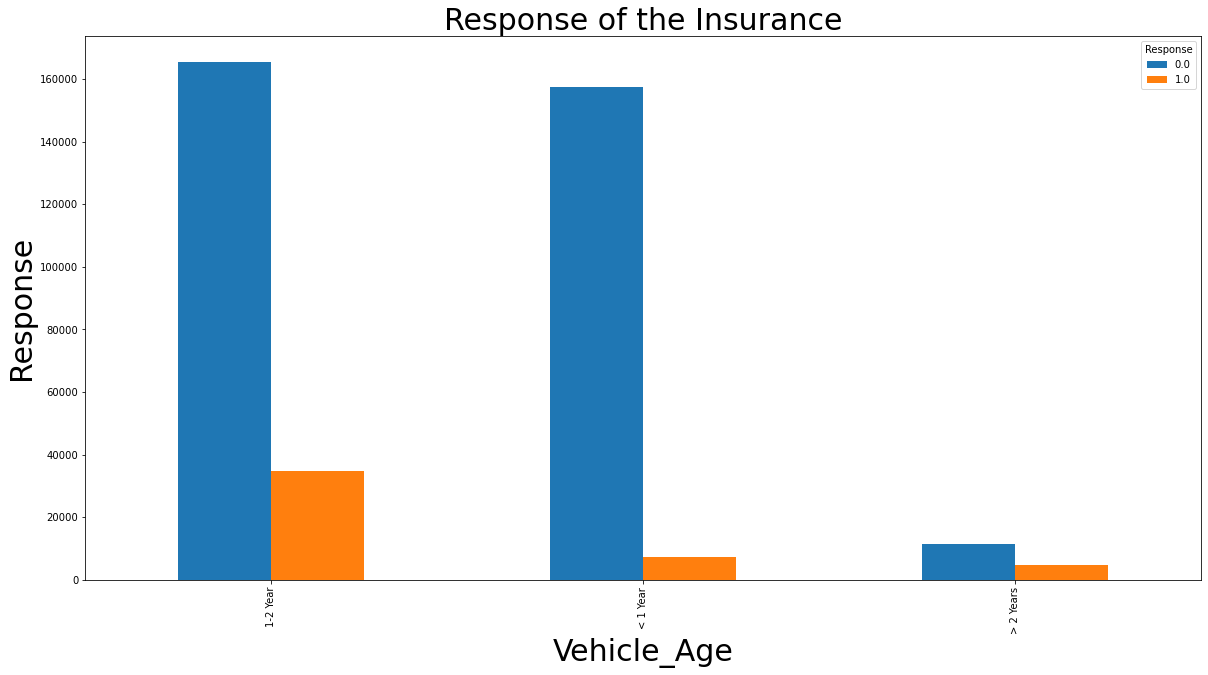

In [9]:
pd.crosstab(df["Vehicle_Age"], df["Response"]).plot(kind = "bar", figsize=(20,10))
plt.title('Response of the Insurance', fontsize = 30)
plt.xlabel("Vehicle_Age", fontsize = 30) 
plt.ylabel('Response', fontsize = 30)

Text(0, 0.5, 'Response')

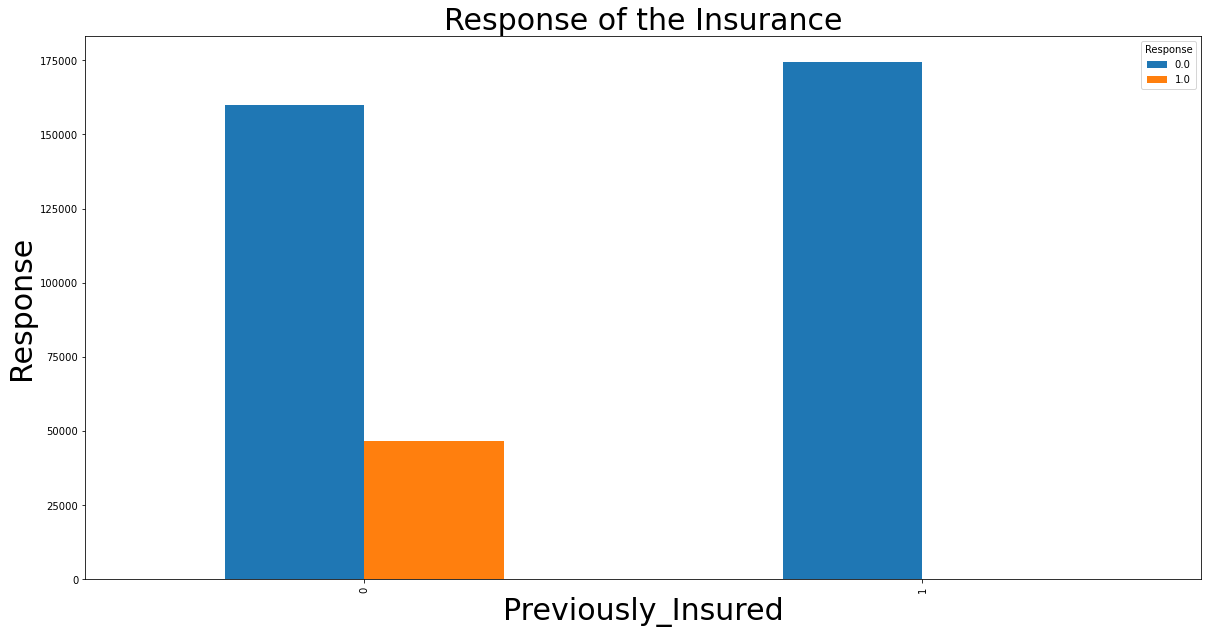

In [10]:
pd.crosstab(df["Previously_Insured"], df["Response"]).plot(kind = "bar", figsize=(20,10))
plt.title('Response of the Insurance', fontsize = 30)
plt.xlabel("Previously_Insured", fontsize = 30)  
plt.ylabel('Response', fontsize = 30)



In [11]:
df.isna().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
source                       0
dtype: int64

In [12]:
df.groupby("Gender").Response.value_counts()

Gender  Response
Female  0.0         156835
        1.0          18185
Male    0.0         177564
        1.0          28525
Name: Response, dtype: int64

In [13]:
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.000643,0.001362,0.001325,0.002557,0.001042,-0.002812,-0.000391,-0.001368
Age,-0.000643,1.000000,-0.079660,0.041649,-0.255582,0.067392,-0.577043,-0.000010,0.111147
Driving_License,0.001362,-0.079660,1.000000,-0.000202,0.014370,-0.012084,0.042862,-0.000850,0.010155
Region_Code,0.001325,0.041649,-0.000202,1.000000,-0.023991,-0.012012,-0.042223,-0.001568,0.010570
Previously_Insured,0.002557,-0.255582,0.014370,-0.023991,1.000000,0.004776,0.221334,0.001664,-0.341170
Annual_Premium,0.001042,0.067392,-0.012084,-0.012012,0.004776,1.000000,-0.114035,-0.000855,0.022575
Policy_Sales_Channel,-0.002812,-0.577043,0.042862,-0.042223,0.221334,-0.114035,1.000000,-0.000814,-0.139042
Vintage,-0.000391,-0.000010,-0.000850,-0.001568,0.001664,-0.000855,-0.000814,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [14]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.122563
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'source'],
      dtype='object')

In [16]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train


In [17]:
df["Vehicle_Damage"] = np.where(df["Vehicle_Damage"]=="Yes",1,0)


In [18]:
df["Gender"] = np.where(df["Gender"]=="Male",1,0)

In [19]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1.0,train
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0.0,train
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1.0,train
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0.0,train
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0.0,train


In [18]:
## include numerical column
#df_number_columns = df.select_dtypes(include=np.number).drop(columns = ["Response"]).columns
## include catagorical column
#df_category_columns = df.select_dtypes(exclude = np.number).columns

In [125]:
## drop columns 
##data_to_encode = df[df_category_columns].drop(columns = ["source"])

In [20]:
##df_category_encoded = pd.get_dummies(data_to_encode)

In [21]:
##df_final_new = pd.concat([df_category_encoded, df[df_number_columns],df[["Response","source"]]], axis= 1)


In [22]:
##df_final  = df_final_new.drop(columns =  ["Vintage", "Annual_Premium", "Policy_Sales_Channel"])

In [20]:
df_final  = df.drop(columns =  ["Vehicle_Age", "Annual_Premium", "Policy_Sales_Channel"])

In [21]:
df_final.head()
df["Driving_License"].value_counts()

1    507097
0      1049
Name: Driving_License, dtype: int64

In [22]:
train_preprocessed = df_final[df["source"]=="train"]


In [23]:
train_X = train_preprocessed.drop(columns = ["Response", "source"])

In [24]:
train_y = train_preprocessed[["Response"]]

In [177]:
#train_y.head()
#train_y.set_index('id', inplace = True)

In [25]:
train_X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Vintage
0,1,1,44,1,28.0,0,1,217
1,2,1,76,1,3.0,0,0,183
2,3,1,47,1,28.0,0,1,27
3,4,1,21,1,11.0,1,0,203
4,5,0,29,1,41.0,1,0,39


In [26]:
test_preprocessed = df_final[df["source"]=="test"]

In [27]:
test_X = test_preprocessed.drop(columns = ["Response", "source"])

In [28]:
test_X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Vintage
0,381110,1,25,1,11.0,1,0,53
1,381111,1,40,1,28.0,0,1,111
2,381112,1,47,1,28.0,0,1,199
3,381113,1,24,1,27.0,1,1,187
4,381114,1,27,1,28.0,1,0,297


In [29]:
#sample.set_index('id', inplace = True)
sample_new = sample[["Response"]]
#sample.head()

In [30]:
sample_new.shape

(127037, 1)

## Logistic Model 

In [31]:
def run_model_validate(model, train_X, train_y, test_X, test_y, filename):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    sample["Response"] = pred_test
    sample.to_csv(filename, index = False)
    print("Train Accuracy : ",accuracy_score(train_y, pred_train))
    print("Test Accuracy : ",accuracy_score(test_y, pred_test))

    print("Train F1 Score : ",f1_score(train_y, pred_train))
    print("Test F1 Score : ",f1_score(test_y, pred_test))

    print("Train Confusion Matrix : ",confusion_matrix(train_y, pred_train))
    print("Test Confusion Matrix : ",confusion_matrix(test_y, pred_test))

    print("Train Classification Report : ",classification_report(train_y, pred_train))
    print("Test Classification Report : ",classification_report(test_y, pred_test))

    return model, accuracy_score(test_y, pred_test), f1_score(test_y, pred_test)

## Linear Model

In [32]:
#sample = pd.read_csv("sample_submission.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    #pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    print("RMSE of Test Data = ",np.sqrt(mean_squared_error(sample, pred_test)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["Response"] = pred_test
    sample.to_csv(filename, index = False)

In [33]:
test_X.shape

(127037, 8)

In [34]:
train_X.shape

(381109, 8)

In [35]:
sample_new.shape

(127037, 1)

In [36]:
train_y.shape

(381109, 1)

In [37]:
train_y.head()

,Response
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


## Logistic Regression

In [38]:
model = LogisticRegression()
model_name, accuracy, f1score = run_model_validate(model, train_X, train_y, test_X, sample_new, "new_final_regres_reg1_.csv")
#run_model(model, train_X, train_y, test_X, sample_new, "new_final_regres_reg.csv")

Train Accuracy :  0.8774313910193672
Test Accuracy :  1.0
Train F1 Score :  0.0
Test F1 Score :  0.0
Train Confusion Matrix :  [[334397      2]
 [ 46710      0]]
Test Confusion Matrix :  [[127037]]
Train Classification Report :                precision    recall  f1-score   support

         0.0       0.88      1.00      0.93    334399
         1.0       0.00      0.00      0.00     46710

    accuracy                           0.88    381109
   macro avg       0.44      0.50      0.47    381109
weighted avg       0.77      0.88      0.82    381109

Test Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00    127037

    accuracy                           1.00    127037
   macro avg       1.00      1.00      1.00    127037
weighted avg       1.00      1.00      1.00    127037



# Linear Regression

In [39]:
model = LinearRegression()
#model_name, accuracy, f1score = run_model(model, train_X, train_y, test_X, sample, "new_final_regres_reg.csv")
run_model(model, train_X, train_y, test_X, sample_new, "new_final_regres_reg_latest.csv")

RMSE of Train Data =  0.30519805342485923
RMSE of Test Data =  0.17077072689277967
Cross validation Score  =  0.3052026822053299


In [40]:
train['Response'].value_counts(normalize = True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

#  ALL Regression Models

In [ ]:
model = [LogisticRegression(penalty = 'none'), LogisticRegression(solver = 'liblinear',penalty='l1'), LogisticRegression(penalty='l2'), 
        LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet'),
         KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

result = []
for i in model:
    if (i == LogisticRegression(penalty = 'none')):
         model_name = 'LogisticRegression'
         print("model_name", model_name)
    elif (i == LogisticRegression(solver = 'liblinear',penalty='l1')):
        model_name = 'LassoRegression'
    elif (i == LogisticRegression(penalty='l2')):
        model_name = 'RidgeRegression'
    elif (i == LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet')):
        model_name = 'Elasticnet'
    elif (i == KNeighborsClassifier()):
        model_name = 'KNN'
    elif (i == DecisionTreeClassifier()):
        model_name = 'DecisionTree'
    elif (i == RandomForestClassifier()):
        model_name = 'RandomForest'
    elif (i == AdaBoostClassifier()):
        model_name = 'AdaBoost'
    elif (i == GradientBoostingClassifier()):
        model_name = 'GradientBoosting'
    file_name = "Final" + "_" + str(model_name) + "_" + "output" + ".csv"
    model_name, accuracy, f1score = run_model_validate(i, train_X, train_y, test_X, sample_new, file_name )
    result.append([model_name, accuracy, f1score])

In [188]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

,Model,Accuracy,F1 Score
0,LogisticRegression(penalty='none'),1.0,1.0
1,"LogisticRegression(penalty='l1', solver='libli...",1.0,1.0
2,LogisticRegression(),1.0,1.0
3,"LogisticRegression(l1_ratio=0.5, penalty='elas...",1.0,1.0
4,KNeighborsClassifier(),1.0,0.0
5,DecisionTreeClassifier(),1.0,1.0
6,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0
7,"(DecisionTreeClassifier(max_depth=1, random_st...",1.0,1.0
8,([DecisionTreeRegressor(criterion='friedman_ms...,1.0,1.0


## Under Sampling

In [23]:
accept = train_preprocessed[train_preprocessed["Response"]==1]

In [24]:
accept.shape

(46710, 10)

In [25]:
reject = train_preprocessed[train_preprocessed["Response"]==0]

In [26]:
reject.shape

(334399, 10)

In [27]:
selected_reject = reject.sample(n = 46710, random_state= 20)  ## random state changed from 20  to 10

In [28]:
selected_reject.shape

(46710, 10)

In [29]:
data_undersample = pd.concat([accept,selected_reject ])

In [30]:
data_undersample.shape

(93420, 10)

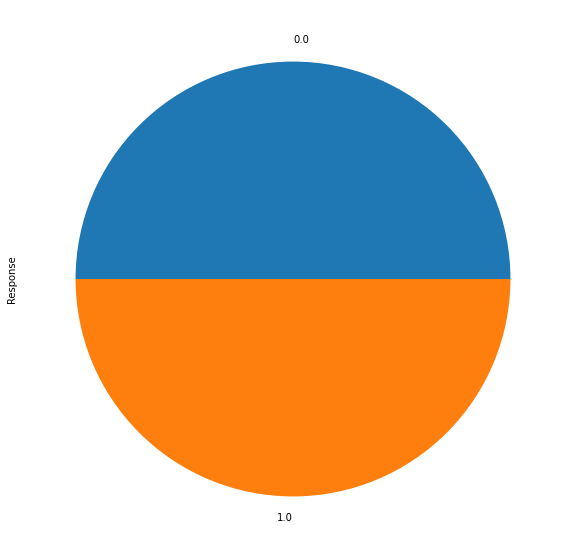

In [31]:
data_undersample["Response"].value_counts().plot(kind = "pie", figsize = (10,10))

In [32]:
train_X = data_undersample.drop(columns=  ["Response", "source"])


In [33]:
train_y = data_undersample['Response']
#sample_new = sample['Response']

In [34]:
sample.shape

(127037, 2)

In [35]:
sample_lat = sample['Response']

In [36]:
train_X.shape, test_X.shape, train_y.shape, sample_lat.shape

((93420, 8), (127037, 8), (93420,), (127037,))

In [37]:
train_X.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Vintage'],
      dtype='object')

## XGBoost  After Sampling

In [44]:
param = {
'max_depth' : 4, 
'eta' : 0.3,
'objective': 'multi:softmax',
'num_class' : 4   ## earlier it was 3 
}
epochs = 20   ## earlier it was 10

In [47]:
train = xgb.DMatrix(train_X, label=train_y)
test = xgb.DMatrix(test_X, label = sample_new)
model = xgb.train(param, train, epochs)


[20:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
preds = model.predict(test)
sample['Response'] = preds
sample.to_csv('submission_XG_latest_2.csv')

## Linear Regression After Sampling

In [303]:
model = LinearRegression()
#model_name, accuracy, f1score = run_model(model, train_X, train_y, test_X, sample, "new_final_regres_reg.csv")
run_model(model, train_X, train_y, test_X, sample_lat, "new_final_regres_reg_latest1.csv")

RMSE of Train Data =  0.39402472111146886
RMSE of Test Data =  0.495736734341868
Cross validation Score  =  0.4510461316287719


## Logistic Regression After Sampling

In [306]:
model = LogisticRegression()
model_name, accuracy, f1score = run_model_validate(model, train_X, train_y, test_X, sample_lat, "new_final_regres_reg3_.csv")

Train Accuracy :  0.5
Test Accuracy :  1.0
Train F1 Score :  0.6666666666666666
Test F1 Score :  1.0
Train Confusion Matrix :  [[    0 46710]
 [    0 46710]]
Test Confusion Matrix :  [[127037]]
Train Classification Report :                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     46710
         1.0       0.50      1.00      0.67     46710

    accuracy                           0.50     93420
   macro avg       0.25      0.50      0.33     93420
weighted avg       0.25      0.50      0.33     93420

Test Classification Report :                precision    recall  f1-score   support

         1.0       1.00      1.00      1.00    127037

    accuracy                           1.00    127037
   macro avg       1.00      1.00      1.00    127037
weighted avg       1.00      1.00      1.00    127037



## Stacking

In [ ]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression(solver = 'liblinear',penalty='l1')

lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['GBM', 
                       'Random Forest', 
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X, y, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

In [316]:
train_y.value_counts(normalize = True)

0.0    0.5
1.0    0.5
Name: Response, dtype: float64

## All Models After under sampling

In [308]:
model = [LogisticRegression(penalty = 'none'), LogisticRegression(solver = 'liblinear',penalty='l1'), LogisticRegression(penalty='l2'), 
        LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet'),
         KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

result = []
for i in model:
    if (i == LogisticRegression(penalty = 'none')):
         model_name = 'LogisticRegression'
         print("model_name", model_name)
    elif (i == LogisticRegression(solver = 'liblinear',penalty='l1')):
        model_name = 'LassoRegression'
    elif (i == LogisticRegression(penalty='l2')):
        model_name = 'RidgeRegression'
    elif (i == LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet')):
        model_name = 'Elasticnet'
    elif (i == KNeighborsClassifier()):
        model_name = 'KNN'
    elif (i == DecisionTreeClassifier()):
        model_name = 'DecisionTree'
    elif (i == RandomForestClassifier()):
        model_name = 'RandomForest'
    elif (i == AdaBoostClassifier()):
        model_name = 'AdaBoost'
    elif (i == GradientBoostingClassifier()):
        model_name = 'GradientBoosting'
    file_name = "Final" + "_" + str(model_name) + "_" + "output" + ".csv"
    model_name, accuracy, f1score = run_model_validate(i, train_X, train_y, test_X, sample_lat, file_name )
    result.append([model_name, accuracy, f1score])

Train Accuracy :  0.5
Test Accuracy :  1.0
Train F1 Score :  0.6666666666666666
Test F1 Score :  1.0
Train Confusion Matrix :  [[    0 46710]
 [    0 46710]]
Test Confusion Matrix :  [[127037]]
Train Classification Report :                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     46710
         1.0       0.50      1.00      0.67     46710

    accuracy                           0.50     93420
   macro avg       0.25      0.50      0.33     93420
weighted avg       0.25      0.50      0.33     93420

Test Classification Report :                precision    recall  f1-score   support

         1.0       1.00      1.00      1.00    127037

    accuracy                           1.00    127037
   macro avg       1.00      1.00      1.00    127037
weighted avg       1.00      1.00      1.00    127037

Train Accuracy :  0.7840184114750589
Test Accuracy :  1.0
Train F1 Score :  0.8188437676761329
Test F1 Score :  1.0
Train Confusion Matrix :  [[2

In [315]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

,Model,Accuracy,F1 Score
0,LogisticRegression(penalty='none'),1.0,1.0
1,"LogisticRegression(penalty='l1', solver='libli...",1.0,1.0
2,LogisticRegression(),1.0,1.0
3,"LogisticRegression(l1_ratio=0.5, penalty='elas...",1.0,1.0
4,KNeighborsClassifier(),1.0,0.0
5,DecisionTreeClassifier(),1.0,1.0
6,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0
7,"(DecisionTreeClassifier(max_depth=1, random_st...",1.0,1.0
8,([DecisionTreeRegressor(criterion='friedman_ms...,1.0,1.0
